## Семинар 1 "Полносвязные нейронные сети"

ФИО: Новикова Анастасия Сергеевна

В этом задании вам предстоит реализовать проход "вперед" для полносвязной нейронную сети. В дальнейшем мы реализуем процедуру обучения и научим сеть распознавать рукописные цифры.

На первой лекции мы познакомились с тем, что такое нейронные сети и изучили три слоя — линейный, сигмоида и SoftMax. Из этих слоев можно составлять глубокие архитектуры и обучать их при помощи градиентного спуска. Чтобы конструировать сложные архитектуры, можно реализовать каждый тип слоя как отдельный "кирпичик" и затем собирать полную архитектуру как конструктор. Это мы и попробуем сделать на первом и втором семинарах.

Каждый тип слоя мы будем реализовывать при помощи класса, который будет поддерживать три функции: forward, которая будет применять функцию, реализуемую слоем, к входной матрице и backward, которая будет вычислять градиенты и step, которая будет обновлять веса. Чтобы не применять функцию к каждому объекту в отдельности, мы будем подавать на вход слою матрицу размера (N, d), где N — количество объектов, а d — размерность каждого объекта.

<img src=backprop.pdf width=400>

Функция forward будет вычислять по $x$ значение $y$, backward — по $\frac{\partial L}{\partial y}$ вычислять $\frac{\partial L}{\partial x}$ и обновлять внутри себя $\frac{\partial L}{\partial w}$.

Важным требованием к реализации является векторизация всех слоев: все операции должны быть сведены к матричным, не должно быть циклов. Это значительно уменьшает временные затраты.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Часть 1: Линейный слой


In [52]:
class Linear:
    def __init__(self, input_size, output_size):        
        '''
        Creates weights and biases for linear layer.
        Dimention of inputs is *input_size*, of output: *output_size*.
        '''
        #### Create weights, initialize them with samples from N(0, 0.1).
        self.input_size = input_size
        self.output_size = output_size
        self.w = np.random.normal(0, 0.1, (self.input_size+1, self.output_size))
        
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, input_size)
        '''
        #### Apply layer to input
        self.X = np.append(X, np.ones((X.shape[0],1)), axis=1)
        self.y = np.dot(self.X, self.w)
        return self.y
    
    def backward(self, dLdy):
        '''
        dLdy [N, output_size]
        '''
        '''
        1. Compute dLdw and dLdx.
        2. Store dLdw for step() call
        3. Return dLdx
        '''
        self.dLdw = np.dot(self.X.T, dLdy)
        self.dLdx = np.dot(dLdy, self.w.T)
        self.grad = self.dLdx[:,:(self.X.shape[1]-1)]
        return self.grad
    
    def gr_func(self, W):
        return self.X[:,:(self.X.shape[1]-1)].dot(W.T) 
    
    def step(self, learning_rate):
        '''
        1. Apply gradient dLdw to network:
        w <- w - l*dLdw
        '''       
        self.w = self.w - learning_rate * self.dLdw

### Часть 2: Численный градиент

Релизуйте функцию проверки численного градиента. Для этого для каждой переменной, по которой считается градиент, надо вычислить численный градиент: $f'(x) \approx \frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$. Функция должна возвращать максимальное абсолютное отклонение аналитического градиента от численного. В качестве $\epsilon$ рекомендуется взять $10^{-6}$. При правильной реализации максимальное отличие будет иметь порядок $10^{-8}-10^{-6}$.

In [135]:
def compute():
    pass

def check_gradient(func, X, gradient):
    '''
    Computes numerical gradient and compares it with analytcal.
    func: callable, function of which gradient we are interested. Example call: func(X)
    X: np.array of size (n x m)
    gradient: np.array of size (n x m)
    Returns: maximum absolute diviation between numerical gradient and analytical.
    '''
    e = 1e-6
    grad = np.empty(X.shape)
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            first_part = X.copy()
            first_part[i][j] = X[i][j] + e
            second_part = X.copy()            
            second_part[i][j] = X[i][j] - e           
            grad[i][j] = (func(first_part) - func(second_part)).sum () / (2 * e) - gradient[i][j]          
    return grad.max()

Протестируйте линейный слой при помощи реализованной функции check_gradient: $\frac{\partial L}{\partial x}$ и $\frac{\partial L}{\partial w}$.

In [155]:
model = Linear(35, 50)
X = np.random.rand(100, 35)
lin = model.forward(X)
# print ("lin", l1.shape)
model.backward(np.ones((N, 50)))
W = np.random.rand (output_size, 35)
print 'Check result: ', check_gradient(model.gr_func, W, model.dLdw.T)

Check result:  1.05687263385e-08


### Часть 3: Сигмоида

In [156]:
def sigmoid_function(x):
    return 1.0 / (1.0 + np.exp(-x))

class Sigmoid:
    def __init__(self):
        pass
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        #### Apply layer to input
        self.X = np.array(X)
        self.sigmoid = sigmoid_function(self.X)
        return self.sigmoid
        
    
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        return dLdy * self.sigmoid * (1 - self.sigmoid)
    
    def step(self, learning_rate):
        pass

Протестируйте слой при помощи реализованной функции check_gradient: $\frac{\partial L}{\partial x}$.

In [158]:
model = Sigmoid()
X = np.random.rand(100, 100)
model.forward(X)
print ('Check result: ', check_gradient(model.forward, X, model.backward(np.ones((N, 100)))))

('Check result: ', 1.1310741232506416e-10)


### Часть 4: Функция потерь

Как мы увидели на семинаре, вычисление производной для связки SoftMax + Negative log-likelihood проще чем для этих двух слоев по отдельности. Поэтому мы реализуем их как один класс. Важное замечание: на проходе "вперед" важно воспользоваться трюком <a href="https://hips.seas.harvard.edu/blog/2013/01/09/computing-log-sum-exp/">log-sum-exp</a>, чтобы не столкнуться с численными неустойчивостями.

In [ ]:
class NLLLoss:
    def __init__(self):
        '''
        Applies Softmax operation to inputs and computes NLL loss
        '''
        #### YOUR CODE HERE
        #### (Hint: No code is expected here, just joking)
        pass
    
    def forward(self, X, y):
        '''
        Passes objects through this layer.
        X is np.array of size (N, C), where C is the number of classes
        y is np.array of size (N), contains correct labels
        '''
        #### YOUR CODE HERE
        #### Apply layer to input
        pass
    
    def backward(self):
        '''
        Note that here dLdy = 1 since L = y
        1. Compute dLdx
        2. Return dLdx
        '''
        #### YOUR CODE HERE
        pass

In [174]:
class NLLLoss:
    def __init__(self):
        '''
        Applies Softmax operation to inputs and computes NLL loss
        '''
        #### (Hint: No code is expected here, just joking)
        pass
    
    def forward(self, X, y):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        y is np.array of size (N,), contains correct labels
        '''
        #### Apply layer to input
        self.X = X
        Xmax = np.max(X, axis=1) 
        self.L = X[range(X.shape[0]),y] - Xmax - np.log(np.sum(np.exp((X.T-Xmax).T),axis=1))       
        return -self.L
        
          
    def backward(self):
        '''
        Note that here dLdy = 1 since L = y
        1. Compute dLdx
        2. Return dLdx
        '''
        #### YOUR CODE HERE
        local_max = np.max(self.X,axis=1)
        self.dLdx = -np.exp(
            self.X.T - local_max - np.log(
                np.sum(
                    np.exp(self.X.T-local_max),
                    axis=0
                )
            )
        ).T
        self.dLdx[range(X.shape[0]),y] += 1
        self.dLdx = -self.dLdx # *negative*
        
        return self.dLdx

Протестируйте слой при помощи реализованной функции check_gradient: $\frac{\partial L}{\partial x}$.

### Часть 5, нейронная сеть

Теперь, когда у нас есть "кирпичики", мы можем написать класс, который будет собирать всю сеть вместе 

In [175]:
class NeuralNetwork:
    def __init__(self, modules):
        '''
        Constructs network with *modules* as its layers
        '''
        #### YOUR CODE HERE

        self.list = []
        for m in modules:
            self.list.append(m)
    
    def forward(self, X):
        #### YOUR CODE HERE
        #### Apply layers to input
        XX = np.array(X)
        for i in self.list:
            XX = i.forward(XX)
        return XX
    
    def backward(self, dLdy):
        '''
        dLdy here is a gradient from loss function
        '''
        #### YOUR CODE HERE
        QQ = dLdy
        for i in self.list[::-1]:
            QQ = i.backward(QQ)
        return QQ
    
    def step(self, learning_rate):
        for l in self.list:
            l.step(learning_rate)

In [177]:
%cd Desktop/Technosphere/Neuron_networks/Seminar\ 1

/Users/an.novikova/Desktop/Technosphere/Neuron_networks/Seminar 1


### Часть 6, обучение на простых данных

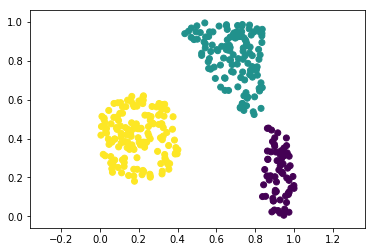

In [178]:
data = np.load('data.npz')
X, y = data['arr_0'], data['arr_1']
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.show()

Обучите архитектуру вида 2 -> 10 -> 10 -> 3:
* Linear(2, 10)
* Sigmoid()
* Linear(10, 10)
* Sigmoid()
* Linear(10, 3)

В качестве функции потерь используйте NLLLoss.
1. Создайте сеть, в цикле запускайте forward, backward, step (используйте learning rate 0.01). 
2. Нарисуйте график сходимости (изменение NLL со временем).
3. Нарисуйте разделяющую поверхность

Отличная визуализация: http://playground.tensorflow.org/

In [187]:
### YOUR CODE HERE:
lr = 0.01
terminator = NeuralNetwork([Linear(2,10), Sigmoid(), Linear(10,10), Sigmoid(), Linear(10,3)])
loss = NLLLoss()
losts = []
for i in range(1000):
    losts.append(loss.forward(terminator.forward(X), y))
    terminator.backward(loss.backward())
    terminator.step(lr)

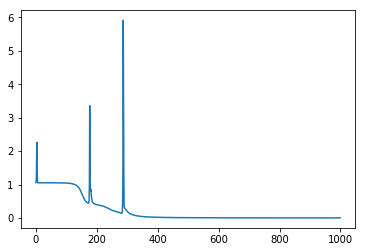

In [188]:
losts = np.array(losts)
plt.plot(losts.mean(axis=1))

plt.show()

In [191]:

# points = 500
# xx = np.linspace(min(X[:,0]),max(X[:,0]),points)
# yy = np.linspace(min(X[:,1]),max(X[:,1]),points)

# xc, yc = np.meshgrid(xx,yy)

# Xgrid=np.array((xc.ravel(), yc.ravel())).T
# plt.scatter(xc,yc,c=terminator.forward(Xgrid).argmax(axis=1),marker=",",cmap="prism")
# plt.scatter(X[:,0],X[:,1],c=y)
# plt.axis('equal')
# plt.show()